In [14]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#connects plotly to pandas

import cufflinks as cf
#make plotly work in your Notewook

from plotly.offline import download_plotlyjs,init_notebook_mode
, plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()
from pmdarima import auto_arima
from statsmodels.tsa.stattools import acovf,acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA,ARMA,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)

In [6]:
nifty=nifty[(nifty.index>'2017-01-01')&(nifty.index<'2019-01-01')]

In [7]:
nifty.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300.0
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300.0
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400.0
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100.0
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400.0
2017-01-09,8259.349609,8263.000000,8227.750000,8236.049805,8236.049805,99100.0
2017-01-10,8262.700195,8293.799805,8261.000000,8288.599609,8288.599609,142900.0
2017-01-11,8327.799805,8389.000000,8322.250000,8380.650391,8380.650391,186500.0
2017-01-12,8391.049805,8417.200195,8382.299805,8407.200195,8407.200195,172600.0


In [8]:
nifty=nifty.asfreq('D')

In [9]:
nifty.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,8210.099609,8212.000000,8133.799805,8179.500000,8179.500000,118300.0
2017-01-03,8196.049805,8219.099609,8148.600098,8192.250000,8192.250000,127300.0
2017-01-04,8202.650391,8218.500000,8180.899902,8190.500000,8190.500000,132400.0
2017-01-05,8226.650391,8282.650391,8223.700195,8273.799805,8273.799805,159100.0
2017-01-06,8281.849609,8306.849609,8233.250000,8243.799805,8243.799805,139400.0
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,8259.349609,8263.000000,8227.750000,8236.049805,8236.049805,99100.0
2017-01-10,8262.700195,8293.799805,8261.000000,8288.599609,8288.599609,142900.0


In [10]:
nifty.drop(labels=['Open', 'High','Low','Volume','Adj Close'], axis=1,inplace=True)

In [11]:
nifty['Holiday'] = pd.Series([1 for x in range(len(nifty.index))])

In [12]:
nifty.head(5)

,Close,Holiday
Date,,
2017-01-02,8179.500000,NaN
2017-01-03,8192.250000,NaN
2017-01-04,8190.500000,NaN
2017-01-05,8273.799805,NaN
2017-01-06,8243.799805,NaN


In [10]:
nifty['Holiday']=nifty['Holiday'].fillna(0)

NameError: name 'nifty' is not defined

In [14]:
nifty.head(5)

,Close,Holiday
Date,,
2017-01-02,8179.500000,0.0
2017-01-03,8192.250000,0.0
2017-01-04,8190.500000,0.0
2017-01-05,8273.799805,0.0
2017-01-06,8243.799805,0.0


In [71]:
brent=pd.read_csv('Brent.csv',index_col='Date',parse_dates=True)

#adding column with constant value


In [58]:
brent.drop

<bound method DataFrame.drop of            Date  Price
0     20-May-87  18.63
1     21-May-87  18.45
2     22-May-87  18.55
3     25-May-87  18.60
4     26-May-87  18.63
...         ...    ...
8549        NaN    NaN
8550        NaN    NaN
8551        NaN    NaN
8552        NaN    NaN
8553        NaN    NaN

[8554 rows x 2 columns]>

In [74]:
brent=brent.asfreq('D')

In [73]:
brent.head(5)

,Price,Holiday
Date,,
1987-05-20,18.63,0
1987-05-21,18.45,0
1987-05-22,18.55,0
1987-05-25,18.60,0
1987-05-26,18.63,0


In [72]:
#adding column with constant value
brent['Holiday'] = 0

In [65]:
range(len(brent.index))

range(0, 1)

In [77]:
brent['Price']=brent['Price'].fillna(0)
brent.head(10)

,Price,Holiday
Date,,
1987-05-20,18.63,0.0
1987-05-21,18.45,0.0
1987-05-22,18.55,0.0
1987-05-23,0.00,1.0
1987-05-24,0.00,1.0
1987-05-25,18.60,0.0
1987-05-26,18.63,0.0
1987-05-27,18.60,0.0
1987-05-28,18.60,0.0


In [22]:
brent.head(5)

,Price,Holiday
Date,,
1987-05-20,18.63,0
1987-05-21,18.45,0
1987-05-22,18.55,0
1987-05-23,0.00,0
1987-05-24,0.00,0


In [76]:
brent.loc[(brent['Price'] == 0),'Holiday'] = 1


In [33]:
brent.size

8554

<AxesSubplot:xlabel='Date'>

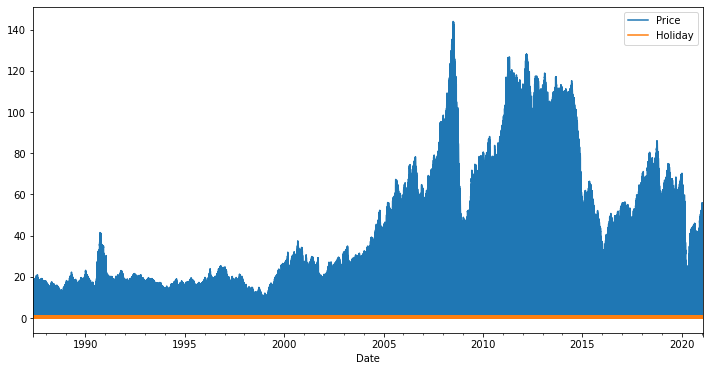

In [25]:
brent.plot(figsize=(12,6))

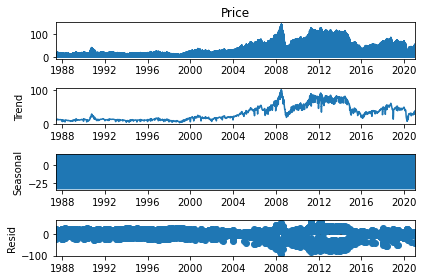

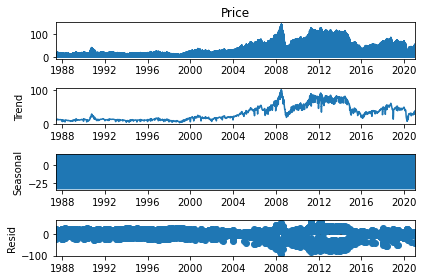

In [26]:
res=seasonal_decompose(brent['Price'],model='add')
res.plot()

<AxesSubplot:xlabel='Date'>

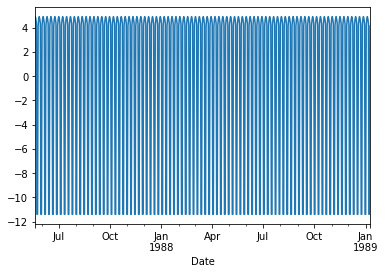

In [78]:
res=seasonal_decompose(brent['Price'],model='add')
res.seasonal.plot()

In [79]:
auto_arima(brent['Price'],seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=2716.712, Time=9.32 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4334.233, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4332.233, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=3425.128, Time=6.66 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=5.98 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=inf, Time=13.67 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=2943.038, Time=7.50 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=3776.106, Time=3.80 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=3288.015, Time=11.21 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=11.03 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=inf, Time=8.17 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=6.87 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=8.60 sec
 ARI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  601
Model:             SARIMAX(5, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -1323.806
Date:                                Sat, 30 Oct 2021   AIC                           2667.613
Time:                                        20:34:58   BIC                           2711.582
Sample:                                             0   HQIC                          2684.729
                                                - 601                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0060      0.037     -0.164      0.870      -0.078       0.066
ar.L2         -0.0258      0.066     -0.391      0.696      -0.155       0.104
ar.L3          0.0529      0.021      2.482      0.013       0.011       0.095
ar.L4         -0.0552      0.042     -1.316      0.188      -0.138       0.027
ar.L5         -0.0128      0.091     -0.141      0.888      -0.192       0.166
ma.L1         -0.9496      0.014    -68.452      0.000      -0.977      -0.922
ar.S.L7        0.9995      0.000   3174.665      0.000       0.999       1.000
ma.S.L7       -0.6905      0.018    -39.084      0.000      -0.725      -0.656
ma.S.L14      -0.2008      0.024     -8.268      0.000      -0.248      -0.153
sigma2         4.5974      0.075     61.561      0.000       4.451       4.744
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33054.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -4.62
Prob(H) (two-sided):                  0.82   Kurtosis:                        38.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
brent

,Price,Holiday
Date,,
1987-05-20,18.63,0.0
1987-05-21,18.45,0.0
1987-05-22,18.55,0.0
1987-05-23,0.00,1.0
1987-05-24,0.00,1.0
...,...,...
1989-01-05,16.58,0.0
1989-01-06,16.85,0.0
1989-01-07,0.00,1.0


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:xlabel='Date'>

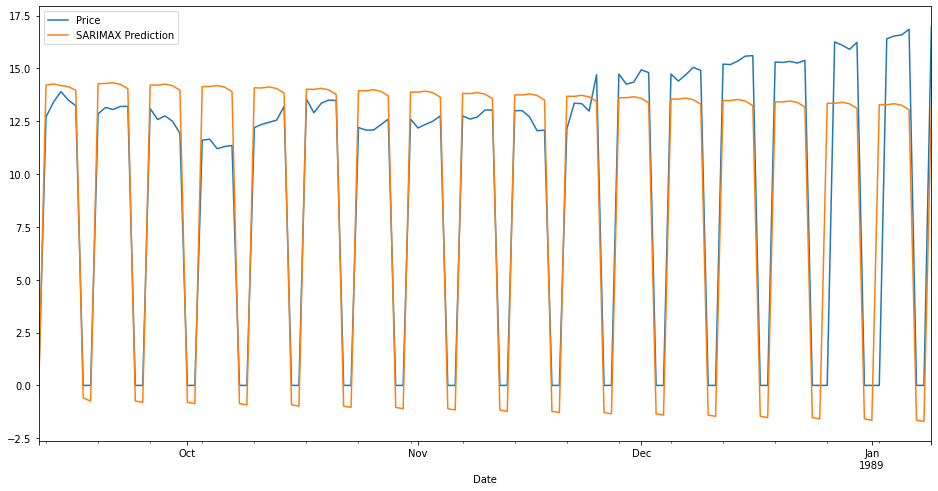

In [82]:
#ARIMA(5,1,1)(1,0,2)[7]
train_df=brent['Price'].iloc[:480]
test_df=brent['Price'].iloc[480:]
mod=SARIMAX(train_df,order=(5,1,1),seasonal_order=(1,0,2,7))
res=mod.fit()
res.summary()

start=len(train_df)
end=len(train_df)+len(test_df)-1
prediction=res.predict(start,end,type='linear').rename('SARIMAX Prediction')
test_df.plot(figsize=(16,8),legend=True)
prediction.plot(legend=True)

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
brent['Price'].mean()


11.394958402662228

In [84]:
np.sqrt(mean_squared_error(test_df,prediction))

2.343889300448924

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot:xlabel='Date'>

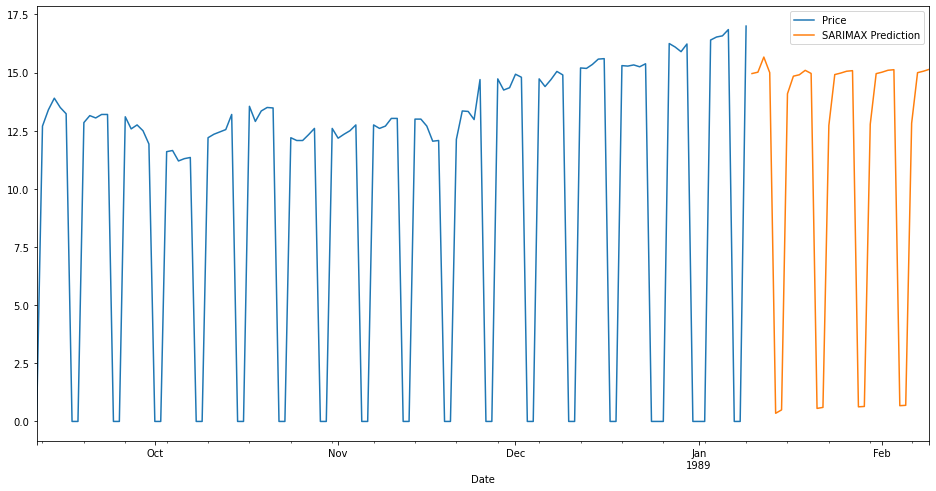

In [86]:
mod=SARIMAX(brent['Price'],order=(5,1,1),seasonal_order=(1,0,2,7 ))
res=mod.fit()
prediction=res.predict(len(brent["Price"]),len(brent["Price"])+30,type='linear').rename('SARIMAX Prediction')
test_df.plot(figsize=(16,8),legend=True)
prediction.plot(legend=True)